### DERNA/EDANN
### Diseño Evolutivo de Redes Neuronales Artificiales
### Evolutionary Design of Artificial Neural Networks

Universidad Central de Venezuela

Trabajo Especial de Grado de Maestría

Realizado por: Juan Manuel Acosta

Tutor: Prof. Dr. Haydemar Nuñez

Junio, 2021

Este programa permite el diseño evolutivo de redes neuronales artificiales.

Se proveen ejemplos de los casos más comunes, pero no está limitado a ellos, el analista puede agregar o modificar código según sus necesidades.

El analista debe configurar los hiperparámetros a optimizar y proveer el código (create_ann, prepare_data) para crear una Red Neuronal Artificial a partir de los hiperparámeros, preparar los datos, entrenar la red y evaluarla.

V 1.0 20200811 Reescritura completa de cero de DERNA, ahora usa genes reales, mapeo, alpha blend y mutación por perturbación gausiana.

V 1.1 20201021 Implementa tres tipos de genes: enteros, reales y ordinales.

V 1.2 20210512 Implementa TimeStopping, corrige bug en ordinales. Profundiza la modularización.

V 2.0 20210613 Se cambia la lectura del csv de Pandas a Numpy.

V 2.1 20210613 Primera prueba optimizando un hiperparámetro ordinal (el optimizador).

V 3.0 20210613 Ejemplo de un caso genérico. Se agregó control de precisión en hiperparámetros reales y se volvió a la lectura de datos en Pandas.

V 3.1 20210826 Ejemplo para optimizar las neuronas y seleccionar un indicador como entrada.

V 3.2 20210827 Ejemplo para optimizar las neuronas y seleccionar dos indicadores como entrada.

V 3.3 20220330 Versión de 3.0 separando los parámetros del optimizador en o. Se reemplaza el concepto de I, R y O por Lista o Número. Predice la tasa de cambio del promedio semanal usando indicadores financieros. Optimiza el número de neuronas en dos capas.

V 3.4 20220401 Optimizando la ventana de disparidad y dos capas de neuronas.

V 3.5 20220401 Optimizando la ventana de disparidad y una capa de neuronas.

This program allows the evolutionary design of Artificial Neural Networks.

It has examples of the most common cases, but it is not limited to them, the analyst can add or modify code as needed.

The analyst must configure the hyperparameters and provide the code (create_ann, prepare_data) to create an Artificial Neural Network based on the hyperparameters, prepare the data, train the network and evaluate it.

V 1.0 20200811 Complete rewrite of DERNA, now it uses real genes, mapping, alpha blend, and Gaussian perturbation mutation.

V 1.1 20201021 It implements three types of genes: integer, real and ordinal.

V 1.2 20210512 Implements TimeStopping, fixes bug in ordinals. Deepens modularization.

V 2.0 20210613 The csv reading is changed from Pandas to Numpy.

V 2.1 20210613 First test optimizing an ordinal hyperparameter (the optimizer).

V 3.0 20210613 Example with a generic case. Added real precision control and returned to Pandas data reader.

V 3.1 20210826 Example to optimize neurons and select one indicator as input.

V 3.2 20210827 Example to optimize neurons and select two indicators as input.

V 3.3 20220330 Versión of 3.0 separating the optimizer parameters in o. Replace I, R, and O by List or Number. Forecasts the rate of change of the weekly average using financial indicators. Optimizes the number of neurons in two layers.

V 3.4 20220401 Optimizing disparity window and neurons in two layers

V 3.5 20220401 Optimizing disparity window and neurons in one layer

### Configuración
### Setup

#### Importar librerías y funciones
#### Import libraries and functions

In [ ]:
!pip install -U tensorflow-addons
!pip install -U deap
!pip install -U ta
import random
import datetime
from deap import creator, base, tools, algorithms
import pandas as pd
import numpy as np
import sklearn.preprocessing as skp
import ta
import tensorflow as tf
import tensorflow_addons as tfa
import matplotlib.pyplot as plt

#### Hiperparámetros del optimizador
#### Optimizer Hyperparameters

In [ ]:
o = {
     # OPTIMIZADOR/OPTIMIZER
     'Neurons': (9, 30, 1),  # min, max, step
     'Disparity Window': (1, 15, 1),
}
# Default indicator parameters
# 'Gain Window': 10 'SMA Window': 10 'SMA2 Window': 5 'ROC Window': 10 'ROC2 Window': 5
# 'MAROC MA Window': 10 'MAROC ROC Window': 10 'MAROC2 MA Window': 5
# 'MAROC2 ROC Window': 5 'Disparity Window': 10 'Disparity2 Window': 5
# 'EMA Window': 14 'EMA2 Window': 7 'LW %R Window': 14
# 'OSCP Slow Window': 26 'OSCP Fast Window': 12 'RSI Window': 14 'ADX Window': 14
# 'Stochastic Window': 14 'Smooth Window': 3 'Stochastic Slow': 3
# 'MACD Slow Window': 26 'MACD Fast Window': 12 'MACD Signal Window': 9
p = {
    'Ticker': '^DJI'
    'From Date': '1993-01-01',  # fecha desde
    'To Date': '2007-12-31',  # fecha hasta
    'Columns': ['Close', 'Disparity'],  # columnas de datos a usar
    'TSWindow': 1,  # ventana de trasposición/trasposition window
     'Horizon': 1  # horizonte de predicción/prediction horizon
}
# 'Date', 'Open', 'High', 'Low', 'Close', 'Volume',
# 'Weekday', 'Normal', 'CCI', 'Gain', 'SMA', 'SMA2',
# 'ROC', 'ROC2', 'MAROC', 'MAROC2', 'Disparity', 'Disparity2',
# 'EMA', 'EMA2', 'LW %R', 'OSCP', 'RSI', 'ADX',
# 'Stochastic %K', 'Stochastic %D', 'Stochastic Slow %D',
# 'MACD', 'MACD Histogram', 'MACD Signal'


#### Otros Hiperparámetros
#### Other Hyperparameters

In [ ]:
# RNA/ANN
p['Layers'] = 1,  # Number of hidden layers
p['Neurons'] = 9,  # neuronas escondidas/hidden layers neurons
p['Neurons2'] = 9,
p['Neurons3'] = 9,
p['Neurons4'] = 9,
p['Activation'] = 'sigmoid',  # https://keras.io/api/layers/activations/
# para las capas ocultas/for the hidden layers
p['Activation2'] = 'sigmoid',
p['Activation3'] = 'sigmoid',
p['Activation4'] = 'sigmoid',
p['Output Activation'] = 'linear',  # capa de salida/output layer
# Data
p['Dscaler'] = skp.MinMaxScaler(feature_range=(-1,1)),  # escalado data
p['Tscaler'] = skp.MinMaxScaler(feature_range=(-1,1)),  # escalado targets
p['Gain Window'] = 10,
p['SMA Window'] = 10,
p['SMA2 Window'] = 5,
p['ROC Window'] = 10,  # AKA Momentum
p['ROC2 Window'] = 5,
p['MAROC MA Window'] = 10,
p['MAROC ROC Window'] = 10,
p['MAROC2 MA Window'] = 5,
p['MAROC2 ROC Window'] = 5,
p['Disparity Window'] = 10,
p['Disparity2 Window'] = 5,
p['EMA Window'] = 14,
p['EMA2 Window'] = 7,
p['LW %R Window'] = 14,
p['OSCP Slow Window'] = 26,  # AKA PPO
p['OSCP Fast Window'] = 12,
p['RSI Window'] = 14,
p['ADX Window'] = 14,
p['Stochastic Window'] = 14,
p['Smooth Window'] = 3,
p['Stochastic Slow'] = 3,
p['MACD Slow Window'] = 26,
p['MACD Fast Window'] = 12,
p['MACD Signal Window'] = 9,

# entrenamiento/training
p['Loss'] = 'mse',  # https] =//keras.io/api/losses/
p['Optimizer'] = 'rmsprop', # https://keras.io/api/optimizers/
# ['adamax','adam','nadam','sgd','adagrad','adadelta','rmsprop','ftrl']
p['Test Split'] = 0.20,  # 20% para prueba/20% for test data
p['Val Split'] = 0.20,  # 20% for validación/20% for validation
# las redes se comparan basado en la pérdida de validación
# networks are compared based on validation loss
p['Seconds'] = 5,  # límite de tiempo para entrenar/training time limit
p['Epochs'] = 50,  # máximas rondas de entrenamiento/max training epochs
p['Batch Size'] = 100,  # tamaño de lote
p['Shuffle'] = False,  # los datos de entrenamiento/the training data
# para series de tiempo normalmente debe ser False a menos que esten
# desestacionalizadas
# for time series normally False unless data has been atemporalized
p['Verbose'] = 0,  # verbosidad del entrenamiento/verbose training

# AG/GA
p['Population'] = 32,  # número de individuos en la población
# debe escogerse basado en el tamaño del espacio a optimizar
# entre más alto mejor cerca de sqrt(tamaño del espacio)
# number of individuals in population
# should be chosen based on the size of the optimization space
# (better high around sqrt(space size))
p['Number of Generations'] = 5,  # número de generaciones (suficiente para que converga)
# DERNA no hace evaluaciones redundantes, por lo que no es peligroso
# un número alto
# number of generations (just high enough)
# EDANN does no redundant evaluations so a high value is not a problem
p['Alpha'] = 0.2,  # sobrepeso del alpha blend (no debe ser muy alto)
# alpha blend oversize (better not too high)
p['Sigma'] = 0.1,  # para la mutación gausiana
# for gaussian mutation
p['Individual Probability'] = 0.2,  # probabilidad individual para la mutación gausiana
# individual probability for gaussian mutation
p['Tournament Size'] = 3,  # tamaño del torneo
# tournament size
p['Crossover Probability'] = 0.6,  # probabilidad de cruce (mejor alta)
# crossover probability (better high)
p['Mutation Probability'] = 0.1,  # probabilidad de mutación (mejor baja)
# mutation probability (better low)
}
# Traducir o a p
# Translate o into p
p['ngenes'] = len(o)  # número de genes a optimizar
# number of genes in each chromosome
p['genes'] = list(o.keys())
p['list'] = [type(i) is list for i in o.values()]
# tipo de cada gen,
# type of each gene
p['min'] = [0 if type(i) is list else i[0] for i in o.values()]
# mínimo valor de cada gen
# minimun value of each gene
p['max'] = [len(i)-1 if type(i) is list else i[1] for i in o.values()]
# máximo valor de cada gen
# maximum value of each gene
p['values'] = [i if type(i) is list else i[2] for i in o.values()]
# lista de valores para los genes ordinales o paso para los números
# list of values for ordinal genes or step for numbers
p['nsteps'] = [int(1 + (p['max'][i] - p['min'][i]) / p['values'][i]
                   ) for i in range(p['ngenes'])]

#### Espacio de búsqueda
#### Search space

In [ ]:
print(f"Search space size:{np.prod(p['nsteps'])}")
p['Population'] = int(np.sqrt(np.prod(p['nsteps'])))
print(f"Population size:{p['Population']}")
p['Number of Generations'] = int(np.log2(p['Population']))
print(f"Generations:{p['Number of Generations']}")
print(f"Estimated Runtime:{p['Seconds']*p['Number of Generations']*p['Population']/2} seconds")

Search space size:330
Population size:18
Generations:4
Estimated Runtime:180.0 seconds


#### Carga de datos
#### Data load

In [ ]:
# copiar el archivo del repositorio
# copy file from repository
# el archivo de datos se puede crear con el programa 'Read data from Yahoo'
# this data file can be created with 'Read Data From Yahoo'
path_to_downloaded_file = tf.keras.utils.get_file(
    p['Ticker'] + '.csv',
    'https://raw.githubusercontent.com/' +
    'jmacostap/webstore/master/' +
    p['Ticker'] + '.csv',
    cache_dir='/content',
    )
# cargar los datos en un dataframe
# load data into a Pandas dataframe
df = pd.read_csv(path_to_downloaded_file)
print(len(df), 'lines read')
print(df)

7466 lines read
            Date          Open          High           Low         Close  \
0     1992-01-02   3152.100098   3172.629883   3139.310059   3172.399902   
1     1992-01-03   3172.399902   3210.639893   3165.919922   3201.500000   
2     1992-01-06   3201.500000   3213.330078   3191.860107   3200.100098   
3     1992-01-07   3200.100098   3210.199951   3184.479980   3204.800049   
4     1992-01-08   3204.800049   3229.199951   3185.820068   3203.899902   
...          ...           ...           ...           ...           ...   
7461  2021-08-16  35490.828125  35631.191406  35231.871094  35625.398438   
7462  2021-08-17  35500.011719  35500.011719  35120.308594  35343.281250   
7463  2021-08-18  35310.199219  35356.800781  34943.410156  34960.691406   
7464  2021-08-19  34874.671875  34997.808594  34690.250000  34894.121094   
7465  2021-08-20  34917.960938  35177.261719  34867.070312  35120.078125   

         Volume  
0      23550000  
1      23620000  
2      27280000  

#### Preparación preliminar de los datos
#### Preliminary data preparation

Aquí se hace el preprocesamiento de los datos que no varían en la optimización

Data preprocessing that is independent of optimizable hyperparameters

In [ ]:
#  transposition of data and targets
def prepare_time_series(time_series, targets, window):
    """Prepara la serie de tiempo para Keras
    como tf.keras.preprocessing.sequence.TimeseriesGenerator
    pero sin crear los lotes
    En el caso típico time_series y targets son el mismo arreglo

    Prepare time series and targets for Keras
    like tf.keras.preprocessing.sequence.TimeseriesGenerator
    without the batches
    In the typical case time_series and targets are the same array

    Args:
    time_series: flat array-like: of values of the time series
    targets: flat array-like: of target values
    X[0] = time_series[0:window]
    Y[0] = targets[window]
    
    Returns:
    X: 2D ndarray: of dataset_length vectors of window elements
    Y: 1D ndarray: of targets[window:]
    """

    dataset_length = len(time_series) - window
    X = np.empty((dataset_length, window))
    Y = np.empty((dataset_length, 1))
    for i in range(dataset_length):
        X[i, :] = time_series[i:(i + window)]
        Y[i, 0] = targets[i + window]
    return X, Y

# preparación de los datos independiente de los hiperparámetros a optimizar
# data preparation that is independent of optimizable hiperparameters

# limpia valores NAN, ceros y muy grandes
# clean NaN, zeros and too big values
df = ta.utils.dropna(df)
print('Original data read after dropping n/a')
print(df)

# encontrar el rango de fechas a usar
# find the date range to use
# date_range = (df['Date'] >= p['From Date']) & (df['Date'] <= p['To Date'])
for iloc_from in range(len(df['Date'])):
    if df['Date'].iloc[iloc_from] >= p['From Date']:
        break
p['iloc_from'] = iloc_from
for iloc_to in range(len(df['Date'])-1,-1,-1):
    if df['Date'].iloc[iloc_to] <= p['To Date']:
        break
p['iloc_to'] = iloc_to
# date_range = iloc_from:iloc_to

# encontrar el punto de corte
# find the split point
iloc_split = np.int((iloc_to - iloc_from + 1) * (1.0 - p['Test Split']))
p['iloc_split'] = iloc_split

# df['Targets'] es la variable independiente
# df['Targets'] is the independent variable

# the following two are good unskewed forward predictions
# rendimiento de mañana
# tomorrow's return
# df['Targets'] = ta.momentum.roc(df['Close'], 1).shift(-1)

# ganancia media de la semana que viene
# next week average return
df['Targets'] = ta.momentum.roc(
    ta.trend.sma_indicator(df['Close'], 5), 5).shift(-5)

# ejemplo agregando todos los indicadores de ta
# example adding all ta features
'''
df = ta.add_all_ta_features(
    df, open='Open', high='High', low='Low',
    close='Close', volume='Volume', fillna=True)
'''
# indicadores comunes
# common indicators
if 'Weekday' in p['Columns']:
    df['Weekday'] = pd.to_datetime(df['Date']).dt.weekday
if 'Normal' in p['Columns']:
    df['Normal'] = (df['High'] + df['Low']) / 2
if 'CCI' in p['Columns']:
    df['CCI'] = ta.trend.cci(df['High'], df['Low'], df['Close'], 20, 0.015)
# indicadores optimizables
if 'Gain' in p['Columns']:
    df['Gain'] = df['Close'] - df['Close'].shift(p['Gain Window'])
if 'SMA' in p['Columns']:
    df['SMA'] = ta.trend.sma_indicator(df['Close'], p['SMA Window'])
if 'SMA2' in p['Columns']:
    df['SMA2'] = ta.trend.sma_indicator(df['Close'], p['SMA2 Window'])
if 'ROC' in p['Columns']:
    df['ROC'] = ta.momentum.roc(df['Close'], p['ROC Window'])
if 'ROC2' in p['Columns']:
    df['ROC2'] = ta.momentum.roc(df['Close'], p['ROC2 Window'])
if 'MAROC' in p['Columns']:
    df['MA'] = ta.trend.sma_indicator(df['Close'], p['MAROC MA Window'])
    df['MAROC'] = ta.momentum.roc(df['MA'], p['MAROC ROC Window'])
if 'MAROC2' in p['Columns']:
    df['MA'] = ta.trend.sma_indicator(df['Close'], p['MAROC2 MA Window'])
    df['MAROC2'] = ta.momentum.roc(df['MA'], p['MAROC2 ROC Window'])
if 'Disparity' in p['Columns']:
    df['MA'] = ta.trend.sma_indicator(df['Close'], p['Disparity Window'])
    df['Disparity'] = 100 * ((df['Close'] / df['MA']) - 1)
if 'Disparity2' in p['Columns']:
    df['MA'] = ta.trend.sma_indicator(df['Close'], p['Disparity2 Window'])
    df['Disparity2'] = 100 * ((df['Close'] / df['MA']) - 1)
if 'EMA' in p['Columns']:
    df['EMA'] = ta.trend.ema_indicator(df['Close'], p['EMA Window'])
if 'EMA2' in p['Columns']:
    df['EMA2'] = ta.trend.ema_indicator(df['Close'], p['EMA2 Window'])
if 'LW %R' in p['Columns']:
    df['LW %R'] = ta.momentum.williams_r(
        df['High'], df['Low'], df['Close'], p['LW %R Window'])
if 'OSCP' in p['Columns']:
    df['EMA1 for OSCP'] =ta.trend.ema_indicator(df['Close'], p['OSCP Slow Window'])
    df['EMA2 for OSCP'] =ta.trend.ema_indicator(df['Close'], p['OSCP Fast Window'])
    df['OSCP'] = 100 * ((df['EMA2 for OSCP'] / df['EMA1 for OSCP']) - 1)
if 'RSI' in p['Columns']:
    df['RSI'] = ta.momentum.rsi(df['Close'], p['RSI Window']) 
if 'ADX' in p['Columns']:
    df['ADX'] = ta.trend.adx(df['High'], df['Low'], df['Close'], p['ADX Window'])
if ('Stochastic %K' in p['Columns'] or
    'Stochastic %D' in p['Columns'] or
    'Stochastic Slow %D' in p['Columns']):
    indicator = ta.momentum.StochasticOscillator(
        df['High'], df['Low'], df['Close'],
        window=p['Stochastic Window'],
        smooth_window=p['Smooth Window'])
    df['Stochastic %K'] = indicator.stoch()
    df['Stochastic %D'] = indicator.stoch_signal()
    df['Stochastic Slow %D'] = ta.trend.sma_indicator(df['Stochastic %D'],
                                                        p['Stochastic Slow'])
if ('MACD' in p['Columns'] or
    'MACD Histogram' in p['Columns'] or
    'MACD Signal' in p['Columns']):
    indicator = ta.trend.MACD(df['Close'],
                              p['MACD Slow Window'],
                              p['MACD Fast Window'],
                              p['MACD Signal Window'])
    df['MACD'] = indicator.macd()
    df['MACD Histogram'] = indicator.macd_diff()
    df['MACD Signal'] = indicator.macd_signal()

# trasponer una serie de tiempo para crear una ventana deslizante
# transposition of a time series to create a sliding window
# tf.keras.preprocessing.sequence.TimeseriesGenerator

Original data read after dropping n/a
            Date          Open          High           Low         Close  \
0     1992-01-02   3152.100098   3172.629883   3139.310059   3172.399902   
1     1992-01-03   3172.399902   3210.639893   3165.919922   3201.500000   
2     1992-01-06   3201.500000   3213.330078   3191.860107   3200.100098   
3     1992-01-07   3200.100098   3210.199951   3184.479980   3204.800049   
4     1992-01-08   3204.800049   3229.199951   3185.820068   3203.899902   
...          ...           ...           ...           ...           ...   
7461  2021-08-16  35490.828125  35631.191406  35231.871094  35625.398438   
7462  2021-08-17  35500.011719  35500.011719  35120.308594  35343.281250   
7463  2021-08-18  35310.199219  35356.800781  34943.410156  34960.691406   
7464  2021-08-19  34874.671875  34997.808594  34690.250000  34894.121094   
7465  2021-08-20  34917.960938  35177.261719  34867.070312  35120.078125   

         Volume  
0      23550000  
1      236200

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations










#### Preparación de los datos optimizados
#### Optimized data prepartion

Aqui se hace la preparación de los datos que depende de los hiperparámetros que se están optimizando.

Here goes the data preparation that is specific to the parameters being optimized.

In [ ]:


def prepare_data(p, df, test=False):
    '''Aquí se hace la preparación de datos según los valores de p
    Prepara los datos y devuelve los datos de entrenamiento y los objetivos
    Here the data is prepared based on the p values
    Prepare the data and return the training and targets data sets

    Args:
    p: dict: of hyperparametrs
    df: pandas.DataFrame: pre-processed data
    test: Bool: wether to return test data or not

    Returns:
    train_data: Numpy Array: train data
    train_targets: Numpy Array: train targets
    test_data: Numpy Array: test data
    test_targets: Numpy Array: test targets
    '''

    # aqui se recalculan las columnas de df que dependen de p
    # los parámetros a optimizar deben estar definidos en o
    # here columns are recalculated based on p values
    # the parameter to be optimized must be defined on o
    # ejemplos agregando indicadores específicos comunes
    # examples adding common specific features
    if 'Gain Window' in p['genes']:
        df['Gain'] = df['Close'] - df['Close'].shift(p['Gain Window'])
    if 'SMA Window' in p['genes']:
        df['SMA'] = ta.trend.sma_indicator(df['Close'], p['SMA Window'])
    if 'SMA2 Window' in p['genes']:
        df['SMA2'] = ta.trend.sma_indicator(df['Close'], p['SMA2 Window'])
    if 'ROC Window' in p['genes']:
        df['ROC'] = ta.momentum.roc(df['Close'], p['ROC Window'])
    if 'ROC2 Window' in p['genes']:
        df['ROC2'] = ta.momentum.roc(df['Close'], p['ROC2 Window'])
    if ('MAROC MA Window' in p['genes'] or
        'MAROC ROC Window' in p['genes']):
        df['MA'] = ta.trend.sma_indicator(df['Close'], p['MAROC MA Window'])
        df['MAROC'] = ta.momentum.roc(df['MA'], p['MAROC ROC Window'])
    if ('MAROC2 MA Window' in p['genes'] or
        'MAROC2 ROC Window' in p['genes']):
        df['MA'] = ta.trend.sma_indicator(df['Close'], p['MAROC2 MA Window'])
        df['MAROC2'] = ta.momentum.roc(df['MA'], p['MAROC2 ROC Window'])
    if 'Disparity Window' in p['genes']:
        df['MA'] = ta.trend.sma_indicator(df['Close'], p['Disparity Window'])
        df['Disparity'] = 100 * ((df['Close'] / df['MA']) - 1)
    if 'Disparity2 Window' in p['genes']:
        df['MA'] = ta.trend.sma_indicator(df['Close'], p['Disparity2 Window'])
        df['Disparity2'] = 100 * ((df['Close'] / df['MA']) - 1)
    if 'EMA Window' in p['genes']:
        df['EMA'] = ta.trend.ema_indicator(df['Close'], p['EMA Window'])
    if 'EMA2 Window' in p['genes']:
        df['EMA2'] = ta.trend.ema_indicator(df['Close'], p['EMA2 Window'])
    if 'LW %R Window' in p['genes']:
        df['LW %R'] = ta.momentum.williams_r(
            df['High'], df['Low'], df['Close'], p['LW %R Window'])
    if ('OSCP Slow Window' in p['genes'] or
        'OSCP Fast Window' in p['genes']):
        df['EMA1 for OSCP'] =ta.trend.ema_indicator(df['Close'], p['OSCP Slow Window'])
        df['EMA2 for OSCP'] =ta.trend.ema_indicator(df['Close'], p['OSCP Fast Window'])
        df['OSCP'] = 100 * ((df['EMA2 for OSCP'] / df['EMA1 for OSCP']) - 1)
    if 'RSI Window' in p['genes']:
        df['RSI'] = ta.momentum.rsi(df['Close'], p['RSI Window']) 
    if 'ADX Window' in p['genes']:
        df['ADX'] = ta.trend.adx(df['High'], df['Low'], df['Close'], p['ADX Window'])
    if ('Stochastic Window' in p['genes'] or
        'Smooth Window' in p['genes'] or
        'Stochastic Slow %D' in p['genes']):
        indicator = ta.momentum.StochasticOscillator(
            df['High'], df['Low'], df['Close'],
            window=p['Stochastic Window'],
            smooth_window=p['Smooth Window'])
        df['Stochastic %K'] = indicator.stoch()
        df['Stochastic %D'] = indicator.stoch_signal()
        df['Stochastic Slow %D'] = ta.trend.sma_indicator(df['Stochastic %D'],
                                                            p['Stochastic Slow'])
    if ('MACD Slow Window' in p['genes'] or
        'MACD Fast Window' in p['genes'] or
        'MACD Signal Window' in p['genes']):
        indicator = ta.trend.MACD(df['Close'],
                                p['MACD Slow Window'],
                                p['MACD Fast Window'],
                                p['MACD Signal Window'])
        df['MACD'] = indicator.macd()
        df['MACD Histogram'] = indicator.macd_diff()
        df['MACD Signal'] = indicator.macd_signal()
    # trasponer la serie de tiempo para crear una ventana deslizante
    # transposition of the time series to create a sliding window
    '''
    # hay que adaptar esto para convertir df1 o usar scikit
    if p['TSWindow'] > 1:
        tf.keras.preprocessing.sequence.TimeseriesGenerator(
            data=train_data,
            targets=train_targets,
            length=p['TSWindow'],
            sampling_rate=1,
            stride=1,
            start_index=0,
            end_index=None,
            shuffle=False,
            reverse=False,
            batch_size=p['Batch Size']
        )
    '''
    # extraer solo las filas que se van a usar
    # extract data that will be used
    df1 = df[p['Columns']+['Targets']][p['iloc_from']:p['iloc_to']]

    train_targets = df1['Targets'].iloc[:p['iloc_split']].values.reshape(-1, 1)
    if test:
        test_targets = df1['Targets'].iloc[p['iloc_split']:].values.reshape(-1, 1)
    # drop targets from training data
    df1.drop(columns=['Targets'], inplace=True)
    train_data = df1.iloc[:p['iloc_split']].values

    # normalizar datos/normalize data
    data_scaler = p['Dscaler']  # should fit only the train set
    train_data = data_scaler.fit_transform(train_data)
    targets_scaler = p['Tscaler']  # should be a different instance
    train_targets = targets_scaler.fit_transform(train_targets)

    if test:
        test_data = df1.iloc[p['iloc_split']:].values
        test_data = data_scaler.transform(test_data)
        test_targets = targets_scaler.transform(test_targets)
        return train_data, train_targets, test_data, test_targets
    else:
        return train_data, train_targets



#### Creación de la RNA
#### ANN Creation

In [ ]:


def create_ann(p, df, time_stop=True):
    '''Crea una RNA con los parámetros de p y la entrena con train_data
    Create an ANN with the parameters on p and train it with train_data

    Args:
    p: dict: of hyperparameters
    df: pandas.DataFrame: pre-processed data
    time_stop: Bool: whether to make time stop or not

    Returns:
    ann: keras.model: the trained neural network
    history: keras.history: the training history
    '''

    # asegura reproducibilidad y consistencia
    # ensure reproducibility and consistency
    tf.random.set_seed(31416)  # keras

    # preparar los datos / prepare the data
    train_data, train_targets = prepare_data(p, df)

    # definir el modelo/define the model
    layers = [tf.keras.layers.Dense(p['Neurons'],
                                    activation=p['Activation'])]
    if p['Layers'] > 1:
        layers.append(
            tf.keras.layers.Dense(p['Neurons2'],
                                  activation=p['Activation2'])
        )
    if p['Layers'] > 2:
        layers.append(
            tf.keras.layers.Dense(p['Neurons3'],
                                  activation=p['Activation3'])
        )
    if p['Layers'] > 3:
        layers.append(
            tf.keras.layers.Dense(p['Neurons4'],
                                  activation=p['Activation4'])
        )
    layers.append(tf.keras.layers.Dense(units=1,
                                        activation=p['Output Activation']))
    ann = tf.keras.Sequential(layers)

    # crear el modelo/create the model
    ann.compile(
        optimizer=p['Optimizer'],
        loss=p['Loss'],
    )


    # Entrenar el modelo/train the model
    if time_stop:
        time_stopping_callback = tfa.callbacks.TimeStopping(
            seconds=p['Seconds'], verbose=1)
        callbacks = [time_stopping_callback]
    else:
        callbacks = None

    history = ann.fit(
        train_data,
        train_targets,
        epochs=p['Epochs'],
        batch_size=p['Batch Size'],
        verbose=p['Verbose'],
        callbacks=callbacks,
        validation_split=p['Val Split'],
        shuffle=p['Shuffle'],
    )
    return ann, history



#### Crear y evaluar la RNA descrita por un cromosoma
#### Create and evaluate the ANN described by a chromosome

In [ ]:


def extract_phenotype(chromosome, p):
    '''Construye el fenotipo correspondiente a un genotipo/cromosoma
    Build the corresponding phenotype for a genotype/chromosome

    Args:
    chromosome: list: of genes. Each gene is a float that describes an
                ANN feature
    p: dict: of hyperparameters

    Returns:
    phenotype: tuple: of hyperparameters
    '''

    phenotype_list=[]
    for i in range(p['ngenes']):
        if p['list'][i]:
            j = chromosome[i] * (p['max'][i])
            phenotype_list.append(p['values'][i][int(j)])
        else:
            n  = int(chromosome[i] * p['nsteps'][i])
            j = p['min'][i] + n * p['values'][i]
            phenotype_list.append(j)
    return tuple(phenotype_list)


def set_phenotype(phenotype, p):
    '''Fija los hiperparámetros en p según un fenotipo
    Set hyperparameters in p as per a phenotype

    Args:
    phenotype: tuple: of parameter values
    p: dict: of hiperparámeters

    Returns:
    p values set as per phenotype
    '''

    for i in range(p['ngenes']):
        p[p['genes'][i]] = phenotype[i]


def print_phenotype(phenotype, p):
    '''Muestra los valores de un fenotipo
    Pretty-print the values of a phenotype

    Args:
    phenotype: tuple: of hiperparámeters
    p: dict: of hiperparámeters

    Returns:
    Nothing
    '''

    for i, j in zip(p['genes'], phenotype):
        print('{}:{} '.format(i,j), end='')
    print('')


def evaluate_chromosome(chromosome, p, df, seen_phenotypes):
    '''Construir, entrenar y evaluar la RNA descrita por un cromosoma
    - Extraer el fenotipo del cromosoma
    - Si ya ha sido evaluado, devolver la pérdida inmediatamente
    - si no, crear la RNA, entrenarla y evaluarla
    - finalmente guardar los errores de entrenamiento y validación

    Build, train and evaluate the ANN represented by a chromosome
    - Extract the phenotype from the chromosome
    - If it has been previously evaluated return the loss immediately
    - otherwise create train and evaluate the ann
    - finally save the training and validation loss

    Args:
    chromosome: list: of genes. Each gene is a float that describes an
                ANN feature
    p: dict: of hyperparameters
    df: pandas.DataFrame: pre-processed data
    seen_phenotypes: dict: evaluated phenotypes and their losses

    Returns:
    (float,): Validation loss
    '''

    phenotype = extract_phenotype(chromosome, p)
    set_phenotype(phenotype, p)
    print_phenotype(phenotype, p)

    # evita evaluar de nuevo el mismo fenotipo
    # avoid evaluating the same phenotype twice
    if phenotype in seen_phenotypes:
        return seen_phenotypes[phenotype],

    # preprocesar los datos para este cromosoma específico
    # prepare dataset for this specific chromosome
    
    # construye la RNA
    # build the ANN
    model, history = create_ann(p, df)

    # extrae y despliega los errores
    # extract and display training and validation loss
    val_loss = history.history['val_loss'][-1]
    loss = history.history['loss'][-1]
    print('Training error: {} Validation error: {}'.format(loss, val_loss))

    # finalmente guarda el error
    # finally, save the loss
    seen_phenotypes[phenotype] = val_loss
    return val_loss,



#### Crea la definición de ajuste
#### Create the fitness definition

In [ ]:
# normalmente fitness trata de maximizar, se usa peso negativo para maximizar
# fitness normally tries to maximize we use negative weight to minimize

creator.create('FitnessMax', base.Fitness, weights=(1.0,))
creator.create('FitnessMin', base.Fitness, weights=(-1.0,))
creator.create('Individual', list, fitness=creator.FitnessMin)

/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


#### Definir el resto de los operadores genéticos en el toolbox
#### Define the rest of the genetic operators on the toolbox

In [ ]:
toolbox = base.Toolbox()
toolbox.register('attr_float', random.random)
toolbox.register('individual', tools.initRepeat, creator.Individual,
                 toolbox.attr_float, n=p['ngenes'])
toolbox.register('Population', tools.initRepeat, list, toolbox.individual)


def checkBounds(min, max):
    '''Decorador para ajustar el valor del gen si se sale de rango
    Decorator to adjust the gene value in case it is out of bounds

    Args:
    min: minimum value
    max: maximum value

    Returns:
    The function that checks bounds to decorate mate or mutate on the toolbox
    '''


    def decorator(func):
        def wrapper(*args, **kargs):
            offspring = func(*args, **kargs)
            for child in offspring:
                for i in range(len(child)):
                    if child[i] > max:
                        child[i] = max
                    elif child[i] < min:
                        child[i] = min
            return offspring
        return wrapper
    return decorator


# cruce por AlphaBlend / mate by AlphaBlend
toolbox.register('mate', tools.cxBlend, alpha=p['Alpha'])
# mantenerse dentro de [0,1) / stay within [0,1)
toolbox.decorate('mate', checkBounds(0.0, 0.99999999999999))
# mutación por perturbación gausiana / mutate by gaussian perturbation
toolbox.register('mutate', tools.mutGaussian, mu=0, sigma=p['Sigma'],
                 indpb=p['Individual Probability'])
# mantenerse dentro de [0,1) / stay within [0,1)
toolbox.decorate('mutate', checkBounds(0.0, 0.99999999999999))
toolbox.register('select', tools.selTournament, tournsize=p['Tournament Size'])
# evita repetir / seen list to avoid multiple evaluations
seen_phenotypes = {}
toolbox.register('evaluate', evaluate_chromosome, p=p, df=df,
                 seen_phenotypes=seen_phenotypes)

### El Algoritmo Genético
### The Genetic Algorithm

### Ejecuta el AG
#### Run the GA

In [ ]:
# siembra el generador aleatorio para asegurar reproducibilidad
# seed the random generator to ensure reproducibility
random.seed(31416) # DEAP/EDANN

seen_phenotypes.clear()

population = toolbox.Population(n=p['Population'])
start_population = toolbox.clone(population)
log = algorithms.eaSimple(population, toolbox, cxpb=p['Crossover Probability'],
                          mutpb=p['Mutation Probability'],
                          ngen=p['Number of Generations'], verbose=True)

Neurons:20 Disparity Window:15 
Timed stopping at epoch 44 after training for 0:00:05
Training error: 0.026326490566134453 Validation error: 0.02721419930458069
Neurons:23 Disparity Window:13 
Timed stopping at epoch 33 after training for 0:00:05
Training error: 0.025783399119973183 Validation error: 0.026622306555509567
Neurons:19 Disparity Window:11 
Timed stopping at epoch 27 after training for 0:00:05
Training error: 0.024994822219014168 Validation error: 0.025919465348124504
Neurons:20 Disparity Window:11 
Timed stopping at epoch 18 after training for 0:00:05
Training error: 0.02528032474219799 Validation error: 0.026369856670498848
Neurons:9 Disparity Window:7 
Timed stopping at epoch 39 after training for 0:00:05
Training error: 0.02278301492333412 Validation error: 0.023005962371826172
Neurons:28 Disparity Window:10 
Training error: 0.0246737077832222 Validation error: 0.025429904460906982
Neurons:14 Disparity Window:9 
Training error: 0.02393399551510811 Validation error: 0.02

#### Muestra las mejores soluciones
#### Show the best solutions

In [ ]:
best_individuals = tools.selBest(population, k=len(population))
# extraer los mejores fenotipos
# extract best phenotype
best_phenotype = extract_phenotype(best_individuals[0], p)
for chromosome in best_individuals:
    phenotype = extract_phenotype(chromosome, p)
    print_phenotype(phenotype, p)

Neurons:15 Disparity Window:5 
Neurons:19 Disparity Window:5 
Neurons:20 Disparity Window:5 
Neurons:20 Disparity Window:5 
Neurons:20 Disparity Window:5 
Neurons:20 Disparity Window:5 
Neurons:25 Disparity Window:5 
Neurons:25 Disparity Window:5 
Neurons:26 Disparity Window:5 
Neurons:26 Disparity Window:5 
Neurons:26 Disparity Window:5 
Neurons:26 Disparity Window:5 
Neurons:27 Disparity Window:5 
Neurons:29 Disparity Window:5 
Neurons:29 Disparity Window:5 
Neurons:29 Disparity Window:5 
Neurons:20 Disparity Window:4 
Neurons:26 Disparity Window:4 


#### Entrenar y probar al mejor individuo
#### Train the best individual and test it

In [ ]:
set_phenotype(best_phenotype, p)

# construir la RNA
# build the ANN
ann, history = create_ann(p, df, time_stop=False)

#### Despliegue gráfico del rendimiento de la RNA entrenada
#### Graphically display the performance of the trained ANN

##### Preparación de datos
##### Data preparation

In [ ]:
train_data, train_targets, test_data, test_targets  = prepare_data(p, df, True)

# es posible que se quiera reentrenar la RNA definitiva sin validación
# you may want to retrain the ANN without validation

test_loss = ann.evaluate(x=test_data,
    y=test_targets,
    batch_size=p['Batch Size'])
train_pred = ann.predict(train_data)
test_pred = ann.predict(test_data)

# desplegar los errores de entrenamiento y validación
# display training and validation losses
print('Best ANN has: ', end='')
print_phenotype(best_phenotype, p)
print('Training loss: {:0.4f} Validation loss: {:0.4f} Test loss: {:0.4f}'.
      format(history.history['loss'][-1], history.history['val_loss'][-1],
             test_loss))
train_size = len(train_targets)
val_split = int((1.0-p['Val Split']) * train_size)
total_size = train_size + len(test_targets)

8/8 [==============================] - 0s 3ms/step - loss: 0.0123
Best ANN has: Neurons:15 Disparity Window:5 
Training loss: 0.0216 Validation loss: 0.0215 Test loss: 0.0123


##### Evolución del error de los primeros dos genes
##### Loss evolution of the first two genes

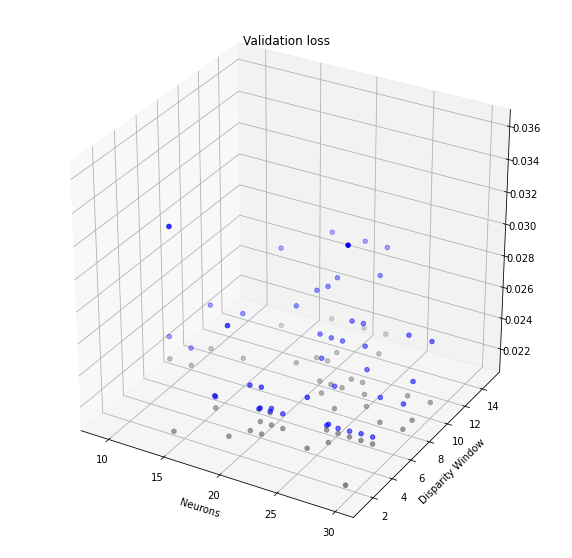

In [ ]:
x = [i[0] for i in seen_phenotypes.keys()]
y = [i[1] for i in seen_phenotypes.keys()]
z = [i for i in seen_phenotypes.values()]
plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.scatter3D( x, y, z, c='Blue')
ax.scatter3D(x, y, min(z), c='Gray')  # sombras/shades
plt.title('Validation loss')
plt.xlabel(p['genes'][0])
plt.ylabel(p['genes'][1])
plt.show()

##### Evolución del error durante el entrenamiento de la mejor RNA
##### Loss evolution during training of the best ANN

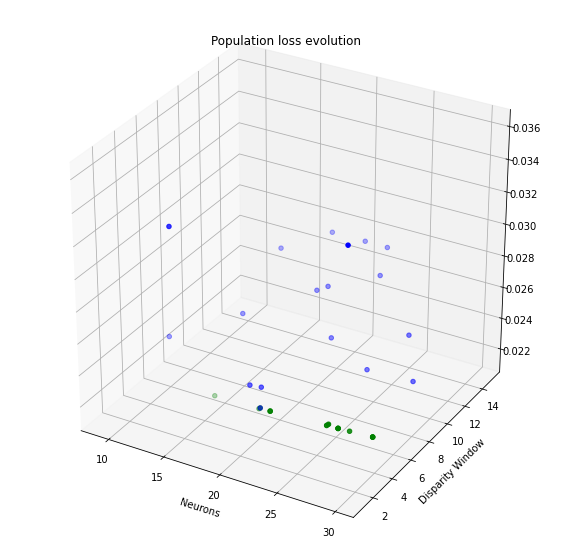

In [ ]:
start_phenotypes = [extract_phenotype(i, p) for i in start_population]
x1 = [i[0] for i in start_phenotypes]
y1 = [i[1] for i in start_phenotypes]
z1 = [seen_phenotypes[i] for i in start_phenotypes]
final_phenotypes = [extract_phenotype(i, p) for i in population]
x2 = [i[0] for i in final_phenotypes]
y2 = [i[1] for i in final_phenotypes]
z2 = [seen_phenotypes[i] for i in final_phenotypes]

plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.scatter3D( x1, y1, z1, c='Blue')  # start population
ax.scatter3D(x2, y2, z2, c='Green')  # final population
plt.title('Population loss evolution')
plt.xlabel(p['genes'][0])
plt.ylabel(p['genes'][1])
plt.show()

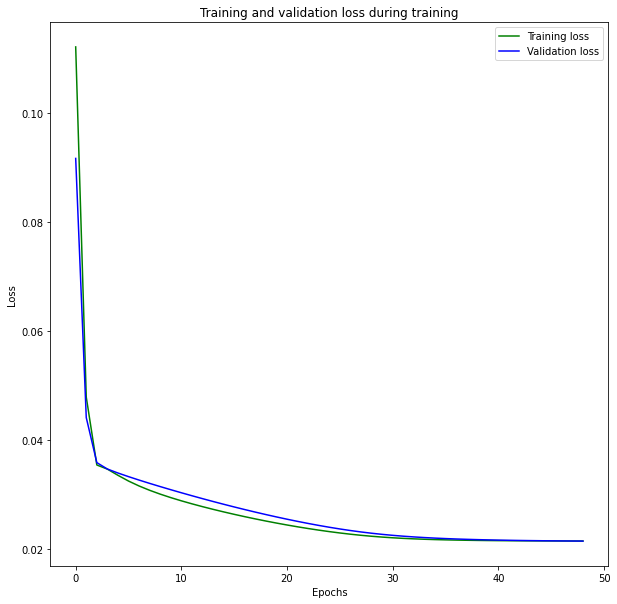

In [ ]:
skip = 1 
# si los primeros valores son muy altos se pueden eliminar
# del gráfico para evitar que afecten la escala automática
# avoid autoscale issues
plt.figure(figsize=(10, 10))
plt.plot(history.history['loss'][skip:], 'g',
            label='Training loss')
plt.plot(history.history['val_loss'][skip:], 'b',
            label='Validation loss')
plt.title('Training and validation loss during training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

##### Datos originales y predicciones de la mejor RNA
##### Original data and predictions of the best ANN

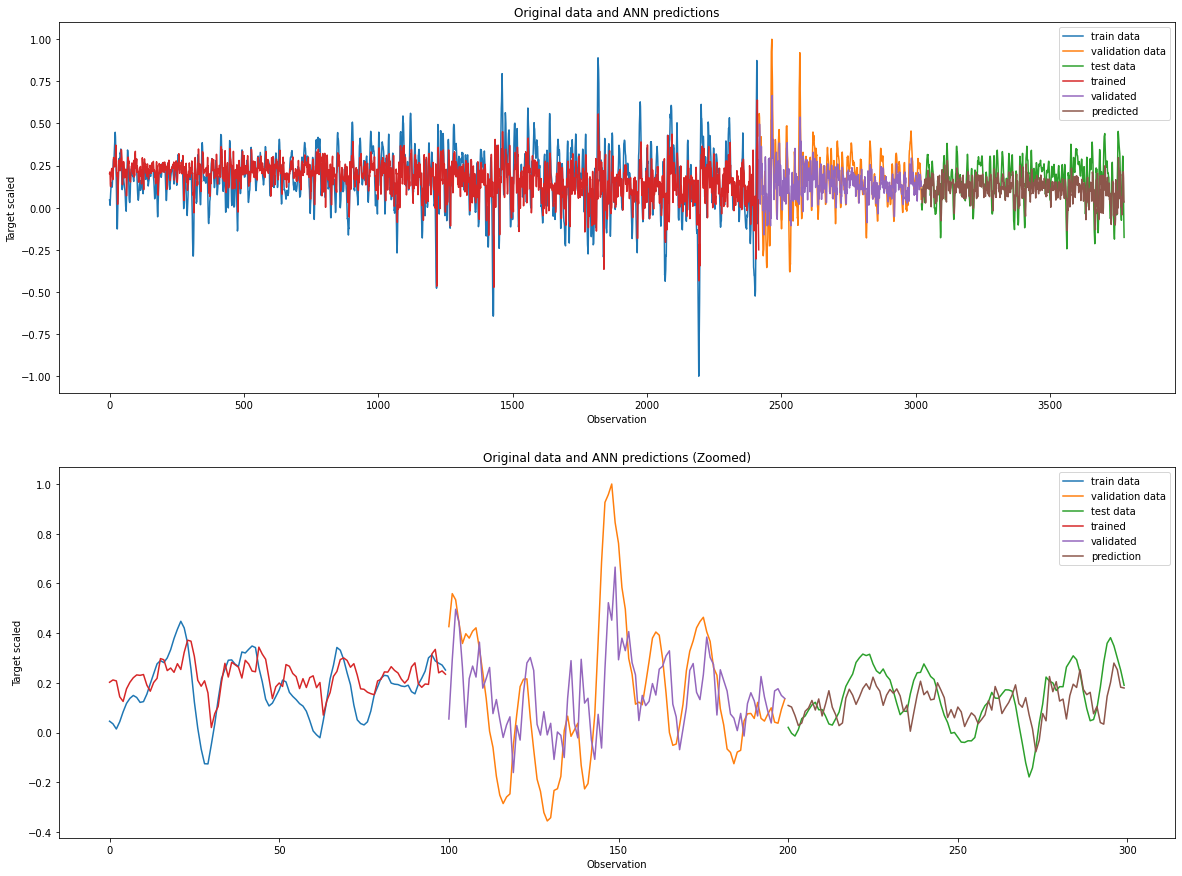

In [ ]:
plt.figure(figsize=(20, 15))
plt.subplot(2,1,1)
plt.plot(range(val_split), train_targets[:val_split], label='train data')
plt.plot(range(val_split, train_size), train_targets[val_split:],
         label='validation data')
plt.plot(range(train_size, total_size), test_targets, label='test data')
plt.plot(range(val_split), train_pred[:val_split], label='trained')
plt.plot(range(val_split, train_size), train_pred[val_split:],
         label='validated')
plt.plot(range(train_size, total_size), test_pred, label='predicted')
plt.title('Original data and ANN predictions')
plt.xlabel('Observation')
plt.ylabel('Target scaled')
plt.legend()

plt.subplot(2,1,2)
zoom_size=100
plt.plot(range(zoom_size), train_targets[:zoom_size], label='train data')
plt.plot(range(zoom_size, 2*zoom_size),
         train_targets[val_split:val_split+zoom_size], label='validation data')
plt.plot(range(2*zoom_size,3*zoom_size),
         test_targets[:zoom_size], label='test data')
plt.plot(range(zoom_size), train_pred[:zoom_size], label='trained')
plt.plot(range(zoom_size, 2*zoom_size),
         train_pred[val_split:val_split+zoom_size], label='validated')
plt.plot(range(2*zoom_size,3*zoom_size),
         test_pred[:zoom_size], label='prediction')
plt.title('Original data and ANN predictions (Zoomed)')
plt.xlabel('Observation')
plt.ylabel('Target scaled')
plt.legend()
plt.show()